### Q1

ANNs consist of layers of neurons, activation functions and connections <br>

Neurons perform dot-product calculations between input and weights <br>
Every layer contains neurons + activation function <br>

Information flows in forward direction, from input layer to output layer (which is why they're called Feed-Forward Networks) <br>

Activation functions are used to introduce non-linearity so it can model more complex data <br>
Common activation functions are sigmoid, ReLU and tanh <br>

Every neuron contains learnable parameters called weights and biases <br>
Weights are used in dot-product calculations with inputs <br>
Biases are added to the result of dot-production <br>
They are adjusted during training to model the data

### Q2

In [1]:
import tensorflow as tf
from keras.datasets.mnist import load_data

tf.config.experimental_run_functions_eagerly(True)


(X_train, y_train), (X_test, y_test) = load_data()

model = tf.keras.Sequential([
    tf.keras.layers.Input((28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

model.summary()

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [2]:
y_train = tf.one_hot(y_train, depth=10)

In [3]:
model.fit(X_train, y_train)

c:\dev\miniconda\envs\faiac\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.8220 - loss: 4.2574


### Q3

Hyperparameter tuning is to adjust parameters which are not adjusted during training by the optimizer <br>
These parameters also affect the performance of a model, so they are very important <br>
E.g:
- Learning Rate: Impacts how fast model learns and how stable training is
- Epochs: Impacts model's accuracy and generalization capability by defining how long model should be trained
- Number of neurons: Impacts model's performance, as more neurons = more accuracy on training set

### Q4

In [4]:
import tensorflow_datasets as tfds

data = tfds.load('iris', split='train', as_supervised=True, shuffle_files=True)
data = data.map(lambda x, y: (x, tf.one_hot(y, depth=3)))
data = data.batch(64).prefetch(tf.data.AUTOTUNE)

In [5]:
activations = ['relu', 'sigmoid', 'tanh']
accuracies = []
for i, activation in enumerate(activations):
    model = tf.keras.Sequential([
        tf.keras.layers.Input((4,)),
        tf.keras.layers.Dense(128, activation=activation),
        tf.keras.layers.Dense(3, activation='softmax'),
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss=tf.keras.losses.categorical_crossentropy,
        metrics=['accuracy']
    )

    hist = model.fit(data, epochs=50)
    accuracies.append(hist.history['accuracy'][-1])

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5431 - loss: 0.9602 
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6659 - loss: 0.8946
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6829 - loss: 0.8547
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6829 - loss: 0.8161
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7703 - loss: 0.7761
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8951 - loss: 0.7396
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7896 - loss: 0.7081
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7661 - loss: 0.6804
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8511 - loss: 0.6552
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8900 - loss: 0.6325
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9591 - loss: 0.6120
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9775 - loss: 0.5926


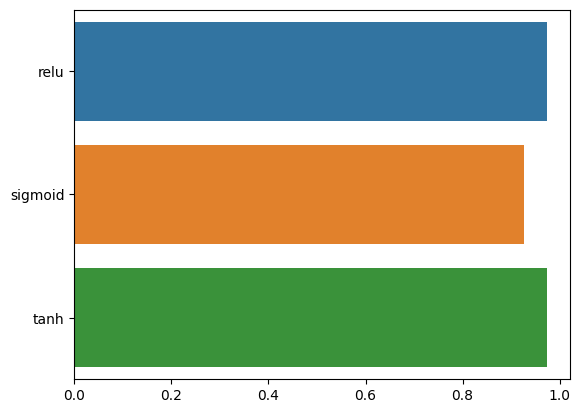

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=accuracies, y=activations, hue=activations)
plt.show()

### Q5

In [85]:
import kagglehub
from os import listdir
import pandas as pd


path = kagglehub.dataset_download("arunavakrchakraborty/australia-weather-data")
path = f"{path}/{[f for f in listdir(path) if '.csv' in f][0]}"
data = pd.read_csv(path)

In [86]:
data

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Row0,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
1,Row1,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
2,Row2,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No
3,Row3,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No
4,Row4,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,...,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42672,Row43633,Uluru,2.4,19.1,0.0,NaN,NaN,E,33.0,SE,...,17.0,59.0,24.0,1030.0,1026.2,NaN,NaN,8.0,18.8,No
42673,Row43634,Uluru,2.3,21.4,0.0,NaN,NaN,SE,22.0,SE,...,7.0,60.0,28.0,1026.9,1022.8,NaN,NaN,8.9,20.3,No
42674,Row43635,Uluru,2.6,22.5,0.0,NaN,NaN,S,19.0,S,...,7.0,59.0,24.0,1025.0,1021.4,NaN,NaN,8.8,22.1,No
42675,Row43636,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,...,17.0,63.0,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No


In [87]:
data = data.drop('row ID', axis=1)

In [10]:
data.isna().sum() / data.shape[0]

Location         0.000000
MinTemp          0.004546
MaxTemp          0.002156
Rainfall         0.010005
Evaporation      0.429084
Sunshine         0.480329
WindGustDir      0.065820
WindGustSpeed    0.065375
WindDir9am       0.070459
WindDir3pm       0.026478
WindSpeed9am     0.009677
WindSpeed3pm     0.018628
Humidity9am      0.012677
Humidity3pm      0.025869
Pressure9am      0.099960
Pressure3pm      0.099468
Cloud9am         0.376901
Cloud3pm         0.400497
Temp9am          0.006795
Temp3pm          0.019261
RainToday        0.010005
dtype: float64

In [11]:
data.isna().sum()

Location             0
MinTemp            194
MaxTemp             92
Rainfall           427
Evaporation      18312
Sunshine         20499
WindGustDir       2809
WindGustSpeed     2790
WindDir9am        3007
WindDir3pm        1130
WindSpeed9am       413
WindSpeed3pm       795
Humidity9am        541
Humidity3pm       1104
Pressure9am       4266
Pressure3pm       4245
Cloud9am         16085
Cloud3pm         17092
Temp9am            290
Temp3pm            822
RainToday          427
dtype: int64

In [12]:
data.value_counts()

Location          MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday
AliceSprings      -5.2     19.4     0.0       4.4          10.2      ENE          33.0           W           E           9.0           17.0          17.0         16.0         1022.5       1017.4       0.0       0.0       6.0      19.0     No           1
PerthAirport       21.0    39.1     0.0       10.6         13.1      WSW          39.0           ENE         WSW         19.0          28.0          55.0         36.0         1010.6       1008.4       1.0       1.0       29.7     36.4     No           1
                   21.1    30.6     0.0       11.2         0.0       E            65.0           E           ENE         41.0          31.0          55.0         40.0         1014.2       1011.8       7.0       7.0       23.1     30.2     No  

In [88]:
# these rows are useless if we don't have output label
data = data.dropna(subset=['RainToday'])

In [89]:
data.isna().sum()

Location             0
MinTemp            136
MaxTemp             87
Rainfall             0
Evaporation      17967
Sunshine         20181
WindGustDir       2763
WindGustSpeed     2744
WindDir9am        2902
WindDir3pm        1092
WindSpeed9am       321
WindSpeed3pm       759
Humidity9am        462
Humidity3pm       1066
Pressure9am       4172
Pressure3pm       4167
Cloud9am         15764
Cloud3pm         16774
Temp9am            216
Temp3pm            788
RainToday            0
dtype: int64

In [72]:
# drop low correlated columns cuz they won't be as useful
# need to convert categorical to numerical first


mappings = {}
for col in data.select_dtypes('object').columns:
    # print(set(data[[col]].values.flatten()))
    alL_vals = set(data[[col]].values.flatten())
    mappings[col] = {}
    for i, val in enumerate(alL_vals, 1):
        mappings[col][val] = i
print(mappings)

{'Location': {'Nhil': 1, 'CoffsHarbour': 2, 'Wollongong': 3, 'NorahHead': 4, 'GoldCoast': 5, 'Brisbane': 6, 'Sale': 7, 'SydneyAirport': 8, 'Bendigo': 9, 'Tuggeranong': 10, 'Cobar': 11, 'Walpole': 12, 'AliceSprings': 13, 'Williamtown': 14, 'WaggaWagga': 15, 'Launceston': 16, 'Hobart': 17, 'Woomera': 18, 'Cairns': 19, 'Katherine': 20, 'NorfolkIsland': 21, 'Adelaide': 22, 'Sydney': 23, 'Richmond': 24, 'Perth': 25, 'MountGambier': 26, 'Albury': 27, 'Canberra': 28, 'Melbourne': 29, 'Moree': 30, 'MelbourneAirport': 31, 'Albany': 32, 'Darwin': 33, 'Watsonia': 34, 'SalmonGums': 35, 'Uluru': 36, 'PerthAirport': 37, 'Ballarat': 38, 'Newcastle': 39, 'Portland': 40, 'Townsville': 41, 'Nuriootpa': 42, 'Mildura': 43, 'MountGinini': 44, 'Dartmoor': 45, 'Witchcliffe': 46, 'Penrith': 47, 'PearceRAAF': 48, 'BadgerysCreek': 49}, 'WindGustDir': {'NNW': 1, 'SW': 2, 'S': 3, 'NE': 4, 'NNE': 5, 'N': 6, nan: 7, 'E': 8, 'WSW': 9, 'SE': 10, 'SSE': 11, 'ENE': 12, 'WNW': 13, 'NW': 14, 'W': 15, 'SSW': 16, 'ESE': 17

In [74]:
mapped = data.copy()
for col in mapped.select_dtypes('object').columns:
    mapped[col] = mapped[col].map(mappings[col])
mapped.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,27,12.9,25.7,0.0,NaN,NaN,9,46.0,15,9,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,1
1,27,9.2,28.0,0.0,NaN,NaN,4,24.0,10,7,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,1
2,27,14.3,25.0,0.0,NaN,NaN,15,50.0,1,15,...,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,1
3,27,9.7,31.9,0.0,NaN,NaN,1,80.0,10,14,...,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,1
4,27,15.9,18.6,15.6,NaN,NaN,15,61.0,2,1,...,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,2


In [76]:
corrs  = mapped.corr()['RainToday']
corrs

Location         0.004945
MinTemp          0.051846
MaxTemp         -0.231728
Rainfall         0.504349
Evaporation     -0.187410
Sunshine        -0.333009
WindGustDir      0.028529
WindGustSpeed    0.160250
WindDir9am       0.017243
WindDir3pm       0.036023
WindSpeed9am     0.106497
WindSpeed3pm     0.078159
Humidity9am      0.355616
Humidity3pm      0.379167
Pressure9am     -0.194716
Pressure3pm     -0.111338
Cloud9am         0.310238
Cloud3pm         0.282970
Temp9am         -0.101195
Temp3pm         -0.237537
RainToday        1.000000
Name: RainToday, dtype: float64

In [84]:
import numpy as np

thresh = 0.1
low_corrs = []
for col, corr in zip(corrs.index, corrs.values):
    if np.abs(corr) < thresh:
        low_corrs.append(col)
low_corrs

['Location',
 'MinTemp',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed3pm']

In [90]:
dataProcessed = data.drop(low_corrs, axis=1)

In [92]:
dataProcessed.isna().sum() / dataProcessed.shape[0]

MaxTemp          0.002059
Rainfall         0.000000
Evaporation      0.425254
Sunshine         0.477657
WindGustSpeed    0.064947
WindSpeed9am     0.007598
Humidity9am      0.010935
Humidity3pm      0.025231
Pressure9am      0.098746
Pressure3pm      0.098627
Cloud9am         0.373112
Cloud3pm         0.397018
Temp9am          0.005112
Temp3pm          0.018651
RainToday        0.000000
dtype: float64

In [98]:
significantMissing = []
percentMissing = dataProcessed.isna().sum() / dataProcessed.shape[0]
for col, val in zip(percentMissing.index, percentMissing):
    if val > 0.3:
        significantMissing.append(col)
significantMissing

['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']

In [101]:
dataProcessed = dataProcessed.fillna({k:'Unknown' for k in significantMissing})
dataProcessed

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,25.7,0.0,Unknown,Unknown,46.0,19.0,38.0,30.0,1007.6,1008.7,Unknown,2.0,21.0,23.2,No
1,28.0,0.0,Unknown,Unknown,24.0,11.0,45.0,16.0,1017.6,1012.8,Unknown,Unknown,18.1,26.5,No
2,25.0,0.0,Unknown,Unknown,50.0,20.0,49.0,19.0,1009.6,1008.2,1.0,Unknown,18.1,24.6,No
3,31.9,0.0,Unknown,Unknown,80.0,7.0,42.0,9.0,1008.9,1003.6,Unknown,Unknown,18.3,30.2,No
4,18.6,15.6,Unknown,Unknown,61.0,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42672,19.1,0.0,Unknown,Unknown,33.0,17.0,59.0,24.0,1030.0,1026.2,Unknown,Unknown,8.0,18.8,No
42673,21.4,0.0,Unknown,Unknown,22.0,11.0,60.0,28.0,1026.9,1022.8,Unknown,Unknown,8.9,20.3,No
42674,22.5,0.0,Unknown,Unknown,19.0,9.0,59.0,24.0,1025.0,1021.4,Unknown,Unknown,8.8,22.1,No
42675,20.6,0.0,Unknown,Unknown,35.0,15.0,63.0,33.0,1027.2,1023.3,Unknown,Unknown,11.0,20.3,No


In [102]:
dataProcessed.isna().sum()

MaxTemp            87
Rainfall            0
Evaporation         0
Sunshine            0
WindGustSpeed    2744
WindSpeed9am      321
Humidity9am       462
Humidity3pm      1066
Pressure9am      4172
Pressure3pm      4167
Cloud9am            0
Cloud3pm            0
Temp9am           216
Temp3pm           788
RainToday           0
dtype: int64

In [173]:
# fill missing values via regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error


dataRegressionFilled = dataProcessed.copy()
for col in dataProcessed.columns:
    if dataProcessed[col].isna().sum() == 0: continue

    ohe = OneHotEncoder(handle_unknown='ignore')
    dataEstimate = data[~data[col].isna()]
    dataEstimate = dataEstimate[dataProcessed.columns]
    x = dataEstimate.drop(col, axis=1)
    y = dataEstimate[col]
    x = ohe.fit_transform(x, y)

    rf = RandomForestRegressor(n_estimators=30, max_depth=10)
    rf.fit(x, y)
    
    preds = rf.predict(ohe.transform(dataProcessed.drop(col, axis=1)))
    
    print(f'Error for {col}: ', mean_squared_error(y, rf.predict(x)))
    dataRegressionFilled.loc[dataProcessed.isna()[col], col] = preds[dataProcessed.isna()[col]]

Error for MaxTemp:  37.64960117419318
Error for WindGustSpeed:  124.68484366131521
Error for WindSpeed9am:  61.81480323835685
Error for Humidity9am:  216.2525407445253
Error for Humidity3pm:  257.7023026863098
Error for Pressure9am:  41.868862464346584
Error for Pressure3pm:  42.75744508732647
Error for Temp9am:  32.33692017671889
Error for Temp3pm:  35.29521839554065


In [172]:
dataRegressionFilled.isna().sum()

MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [174]:
dataFinal = pd.get_dummies(dataRegressionFilled)

In [175]:
from sklearn.preprocessing import StandardScaler

numeric = dataFinal.select_dtypes('number').columns
std = StandardScaler()
dataFinal[numeric] = std.fit_transform(dataFinal[numeric])

In [176]:
dataFinal

,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,...,Cloud3pm_2.0,Cloud3pm_3.0,Cloud3pm_4.0,Cloud3pm_5.0,Cloud3pm_6.0,Cloud3pm_7.0,Cloud3pm_8.0,Cloud3pm_Unknown,RainToday_No,RainToday_Yes
0,0.343458,-0.278514,0.459006,0.571672,-1.626764,-1.042789,-1.474417,-0.973253,0.611108,0.215722,...,True,False,False,False,False,False,False,False,True,False
1,0.666676,-0.278514,-1.192377,-0.332612,-1.256978,-1.720561,-0.000765,-0.360549,0.164274,0.694611,...,False,False,False,False,False,False,False,True,True,False
2,0.245087,-0.278514,0.759258,0.684707,-1.045671,-1.575324,-1.179687,-1.047973,0.164274,0.418887,...,False,False,False,False,False,False,False,True,True,False
3,1.214743,-0.278514,3.011144,-0.784753,-1.415458,-2.059447,-1.282843,-1.735397,0.195090,1.231548,...,False,False,False,False,False,False,False,True,True,False
4,-0.654304,1.575978,1.584949,1.588990,0.380648,2.007185,-3.434375,-3.319460,0.056418,-0.858151,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42672,-0.584039,-0.278514,-0.516811,0.345601,-0.517405,-1.333263,1.826564,1.641947,-1.391939,-0.422797,...,False,False,False,False,False,False,False,True,True,False
42673,-0.260820,-0.278514,-1.342503,-0.332612,-0.464578,-1.139614,1.369732,1.133851,-1.253267,-0.205120,...,False,False,False,False,False,False,False,True,True,False
42674,-0.106238,-0.278514,-1.567691,-0.558682,-0.517405,-1.333263,1.089738,0.924635,-1.268675,0.056092,...,False,False,False,False,False,False,False,True,True,False
42675,-0.373244,-0.278514,-0.366685,0.119530,-0.306098,-0.897552,1.413942,1.208571,-0.929698,-0.205120,...,False,False,False,False,False,False,False,True,True,False


In [181]:
# need only RainToday_Yes
dataFinal= dataFinal.drop('RainToday_No', axis=1)

X = dataFinal.drop('RainToday_Yes', axis=1)
y = dataFinal['RainToday_Yes']

In [186]:
from sklearn.model_selection import train_test_split

# train/test/val sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val =train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [187]:
X_train.shape, y_train.shape

((33800, 429), (33800,))

In [192]:
import tensorflow as tf
import keras


model = keras.models.Sequential([
    keras.layers.Input((429,)),
    keras.layers.Dense(1024, activation='relu'),
    # keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    # keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    # keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2), loss=keras.losses.BinaryCrossentropy, metrics=['accuracy', 'f1_score'])

In [193]:
model.fit(X_train, y_train, validation_data=(X_val, y_val))

   2/1057 ━━━━━━━━━━━━━━━━━━━━ 54s 52ms/step - accuracy: 0.7422 - f1_score: 0.4099 - loss: 0.8347 

c:\dev\miniconda\envs\faiac\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1057/1057 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9458 - f1_score: 0.3634 - loss: 0.1491

c:\dev\miniconda\envs\faiac\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1057/1057 ━━━━━━━━━━━━━━━━━━━━ 44s 42ms/step - accuracy: 0.9459 - f1_score: 0.3634 - loss: 0.1490 - val_accuracy: 0.9865 - val_f1_score: 0.3663 - val_loss: 0.0308


In [194]:
model.evaluate(X_test, y_test)

  1/133 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 1.0000 - f1_score: 0.2703 - loss: 0.0078

c:\dev\miniconda\envs\faiac\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\dev\miniconda\envs\faiac\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9864 - f1_score: 0.3814 - loss: 0.0336


[0.034047383815050125, 0.986508846282959, 0.38031142950057983]